# Food Desert Investigation -- Exploratory Data Analysis
Hypothesis: Access to grocery stores, specialty food stores, and recreation centers are measures of populations with higher educational and employment outcomes.

## Imports

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
from mpl_toolkits.mplot3d import Axes3D

### Data

In [2]:
df = pd.read_csv('new_clean_combined.csv')

## Initial Review
### Column Name Reminders:
* SFSP (Summer Food Service Participants)
* SBP (School Breakfast Program participants)
* NSLP (National School Lunch Program)
* WIC (Women, Infant, and Children supplemental nutrition program)
* SNAP (Supplemental Nutrition Assistance Program)
* CACFP (Child and Adult [% population])

In [3]:
df.head()

,FIPS,State,County,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,...,WIC_PART_2016,Population_Estimate_2016,White,African_american,Asian,Latino,HS_GED,Bachelors,Employed,Unemployed
0,1001,AL,autauga,59447.5,31,44,31,3,525930.9601,32.910876,...,129159.9167,55242,414184,343485,7410,58715,157666,36853,162504,50774
1,1003,AL,baldwin,59447.5,118,156,236,29,525930.9601,32.910876,...,129159.9167,207712,414184,343485,7410,58715,157666,36853,162504,50774
2,1005,AL,barbour,59447.5,19,23,14,4,525930.9601,32.910876,...,129159.9167,25819,414184,343485,7410,58715,157666,36853,162504,50774
3,1007,AL,bibb,59447.5,15,7,7,5,525930.9601,32.910876,...,129159.9167,22576,414184,343485,7410,58715,157666,36853,162504,50774
4,1009,AL,blount,59447.5,27,23,12,5,525930.9601,32.910876,...,129159.9167,57517,414184,343485,7410,58715,157666,36853,162504,50774


In [4]:
df.describe()

,FIPS,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,...,WIC_PART_2016,Population_Estimate_2016,White,African_american,Asian,Latino,HS_GED,Bachelors,Employed,Unemployed
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,...,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3140.000000
mean,30387.632484,129608.522452,40.391083,75.765924,78.621975,20.821975,8.842030e+05,26.956769,2.785856,10.817834,...,2.164955e+05,1.028818e+05,7.709212e+05,272691.833121,49235.972293,3.760988e+05,217874.274841,77881.733121,2.863513e+05,76484.606688
std,15156.372045,154721.098857,97.056911,268.964930,270.112658,90.238333,9.003237e+05,4.398413,0.582904,37.001812,...,2.554410e+05,3.306367e+05,8.067075e+05,239608.317604,92835.992054,7.227860e+05,189556.269947,84311.266970,2.866946e+05,70111.448002
min,1001.000000,7532.750000,0.000000,0.000000,0.000000,0.000000,4.845020e+04,16.722382,1.237415,0.000000,...,1.078283e+04,8.800000e+01,2.052200e+04,0.000000,0.000000,2.420000e+03,12791.000000,3686.000000,1.485200e+04,4139.000000
25%,18178.500000,43433.750000,7.000000,5.000000,7.000000,2.000000,3.767442e+05,23.859642,2.379881,0.000000,...,8.055467e+04,1.095375e+04,2.808670e+05,43244.000000,8264.000000,4.965100e+04,85786.000000,23605.000000,1.029990e+05,26868.000000
50%,29176.000000,71045.000000,15.000000,15.000000,18.000000,5.000000,5.986653e+05,26.713016,2.689100,2.000000,...,1.275510e+05,2.575800e+04,4.898120e+05,199927.000000,23847.000000,1.015880e+05,158470.000000,44745.000000,1.916300e+05,51769.000000
75%,45079.500000,127954.500000,35.250000,45.000000,48.250000,12.000000,1.013673e+06,30.887988,3.065642,6.000000,...,2.347192e+05,6.736150e+04,8.214960e+05,458785.000000,46660.000000,2.287320e+05,286946.000000,88578.000000,3.479850e+05,109218.000000
max,56045.000000,595088.250000,2199.000000,8264.000000,8113.000000,2495.000000,3.377166e+06,35.633484,4.030984,939.000000,...,1.174875e+06,1.012054e+07,2.962647e+06,727850.000000,624499.000000,2.872144e+06,773071.000000,439167.000000,1.233501e+06,353021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      3140 non-null   int64  
 1   State                     3140 non-null   object 
 2   County                    3140 non-null   object 
 3   CACFP_PART_2016           3140 non-null   float64
 4   CONVS16                   3140 non-null   int64  
 5   FFR16                     3140 non-null   int64  
 6   FSR16                     3140 non-null   int64  
 7   GROC16                    3140 non-null   int64  
 8   NSLP_PART_2016            3140 non-null   float64
 9   PCT_WICINFANTCHILD16      3140 non-null   float64
 10  PCT_WICWOMEN16            3140 non-null   float64
 11  RECFAC16                  3140 non-null   int64  
 12  REDEMP_WICS16             3140 non-null   float64
 13  SBP_PART_2016             3140 non-null   float64
 14  SFSP_PAR

### Spread

I am using histograms to examine the spread of every variable.

Key Notes:
* FIPS is the code assigned to each County, State, so the spread is not important to consider since there is one value for each instance.
* FFR16, FSR16, GROC16, RECFAC16, SPECS16, WICS16 are all counts of stores in each county, so the concentration of values close to zero makes sense.
* Outliers for columns for racial groups make sense given the makeup of certain American counties (ie. Hawaiian has a large Asian population).
* SNAP_BBCE16 is a categorical variable, so I will change that from int to category.

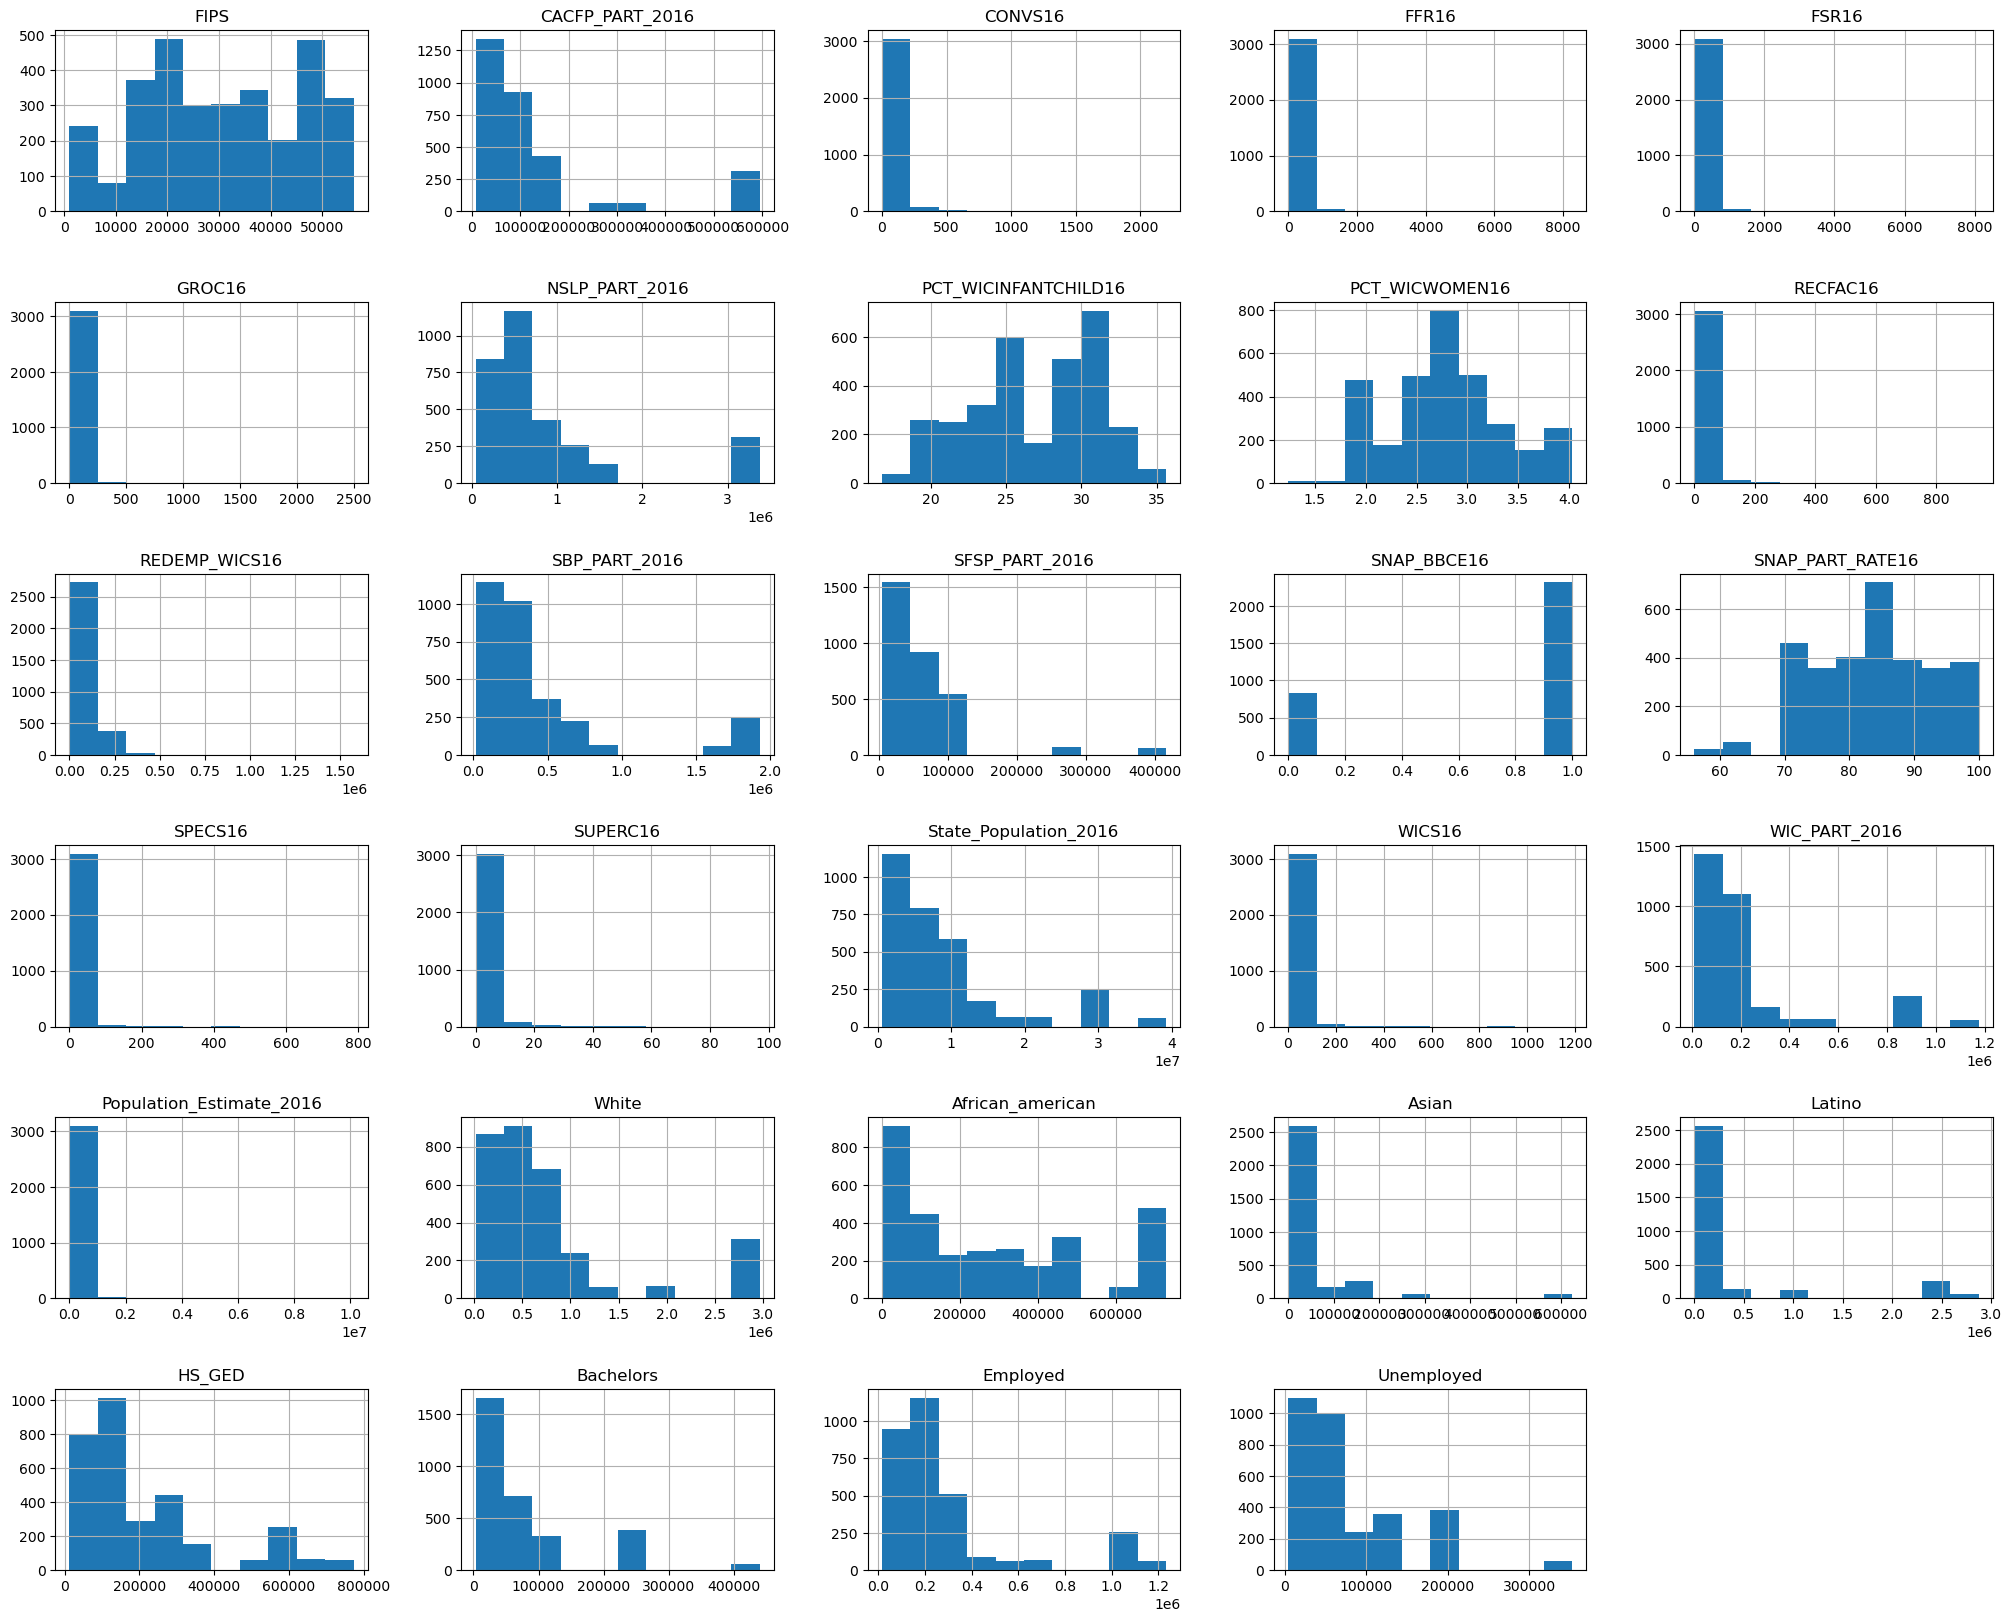

In [6]:
df.hist(figsize = (25,20))
plt.subplots_adjust(hspace=0.5);

## Summary Statistics for Stores Variables

In [7]:
# Grocery stores
df['GROC16'].describe()

count    3140.000000
mean       20.821975
std        90.238333
min         0.000000
25%         2.000000
50%         5.000000
75%        12.000000
max      2495.000000
Name: GROC16, dtype: float64

In [8]:
# Fast food restaurants
df['FFR16'].describe()

count    3140.000000
mean       75.765924
std       268.964930
min         0.000000
25%         5.000000
50%        15.000000
75%        45.000000
max      8264.000000
Name: FFR16, dtype: float64

In [9]:
# Full service restaurants
df['FSR16'].describe()

count    3140.000000
mean       78.621975
std       270.112658
min         0.000000
25%         7.000000
50%        18.000000
75%        48.250000
max      8113.000000
Name: FSR16, dtype: float64

In [10]:
# Specialty food stores
df['SPECS16'].describe()

count    3140.000000
mean        7.465287
std        29.710846
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       787.000000
Name: SPECS16, dtype: float64

## Correlation

In [11]:
corr = df.corr(numeric_only=True)
corr

,FIPS,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,...,WIC_PART_2016,Population_Estimate_2016,White,African_american,Asian,Latino,HS_GED,Bachelors,Employed,Unemployed
FIPS,1.000000,0.138808,-0.039808,-0.050899,-0.051057,-0.034344,0.154191,-0.158109,-0.033347,-0.048643,...,0.104945,-0.055889,0.159569,-0.013164,-0.068917,0.149490,0.073880,0.008266,0.113478,0.025714
CACFP_PART_2016,0.138808,1.000000,0.167380,0.160561,0.160835,0.141671,0.987134,0.483234,0.599480,0.146159,...,0.987407,0.171589,0.977946,0.715693,0.754103,0.976699,0.935827,0.920477,0.983043,0.918684
CONVS16,-0.039808,0.167380,1.000000,0.909071,0.869200,0.700631,0.156429,0.119928,0.035911,0.873456,...,0.181995,0.928044,0.166971,0.160575,0.211195,0.156429,0.209714,0.232068,0.182833,0.219181
FFR16,-0.050899,0.160561,0.909071,1.000000,0.975937,0.835600,0.142968,0.088758,0.008151,0.952760,...,0.179225,0.988938,0.149514,0.108951,0.259166,0.158428,0.185846,0.232445,0.172902,0.212828
FSR16,-0.051057,0.160835,0.869200,0.975937,1.000000,0.843935,0.138826,0.085256,-0.010093,0.966063,...,0.178198,0.956397,0.147896,0.104684,0.270647,0.157590,0.189239,0.243707,0.172120,0.215502
GROC16,-0.034344,0.141671,0.700631,0.835600,0.843935,1.000000,0.114454,0.072604,-0.018350,0.778108,...,0.146109,0.818377,0.116335,0.105763,0.249273,0.123400,0.167299,0.217842,0.142680,0.188864
NSLP_PART_2016,0.154191,0.987134,0.156429,0.142968,0.138826,0.114454,1.000000,0.457460,0.592878,0.126255,...,0.980663,0.153806,0.984239,0.758776,0.700645,0.960207,0.940348,0.897482,0.986737,0.918607
PCT_WICINFANTCHILD16,-0.158109,0.483234,0.119928,0.088758,0.085256,0.072604,0.457460,1.000000,0.831795,0.062911,...,0.509411,0.099310,0.487152,0.464049,0.362727,0.448391,0.517621,0.434470,0.480219,0.492782
PCT_WICWOMEN16,-0.033347,0.599480,0.035911,0.008151,-0.010093,-0.018350,0.592878,0.831795,1.000000,-0.030186,...,0.587770,0.012669,0.592059,0.485917,0.253932,0.595482,0.522505,0.401894,0.557047,0.460583
RECFAC16,-0.048643,0.146159,0.873456,0.952760,0.966063,0.778108,0.126255,0.062911,-0.030186,1.000000,...,0.162750,0.938824,0.133675,0.092750,0.251196,0.144361,0.172860,0.226384,0.156442,0.198738


### Correlation findings:
The correlation printout above shows the following:
* GROC16 is highly correlated with all other restaurants/stores (CONVS16, FFR16, FSR16, RECFAC16, SPECS16, SUPERC16, WICS16). All these are correlated with each other as well.
* Bachelors is highly correlated with Employed, Unemployed, HS_GED, all racial groups, WIC_PART_2016, State_Population_2016, SFSP_Part_2016, SBP_PART_2016, NSLP_PART_2016, and CACFP_PART_2016.
* Employed is highly correlated with CACFP_PART_2016, NSLP_PART_2016, SBP_PART_2016, State_Population_2016, WIC_PART_2016, all racial factors, all educational factors, and Unemployed.

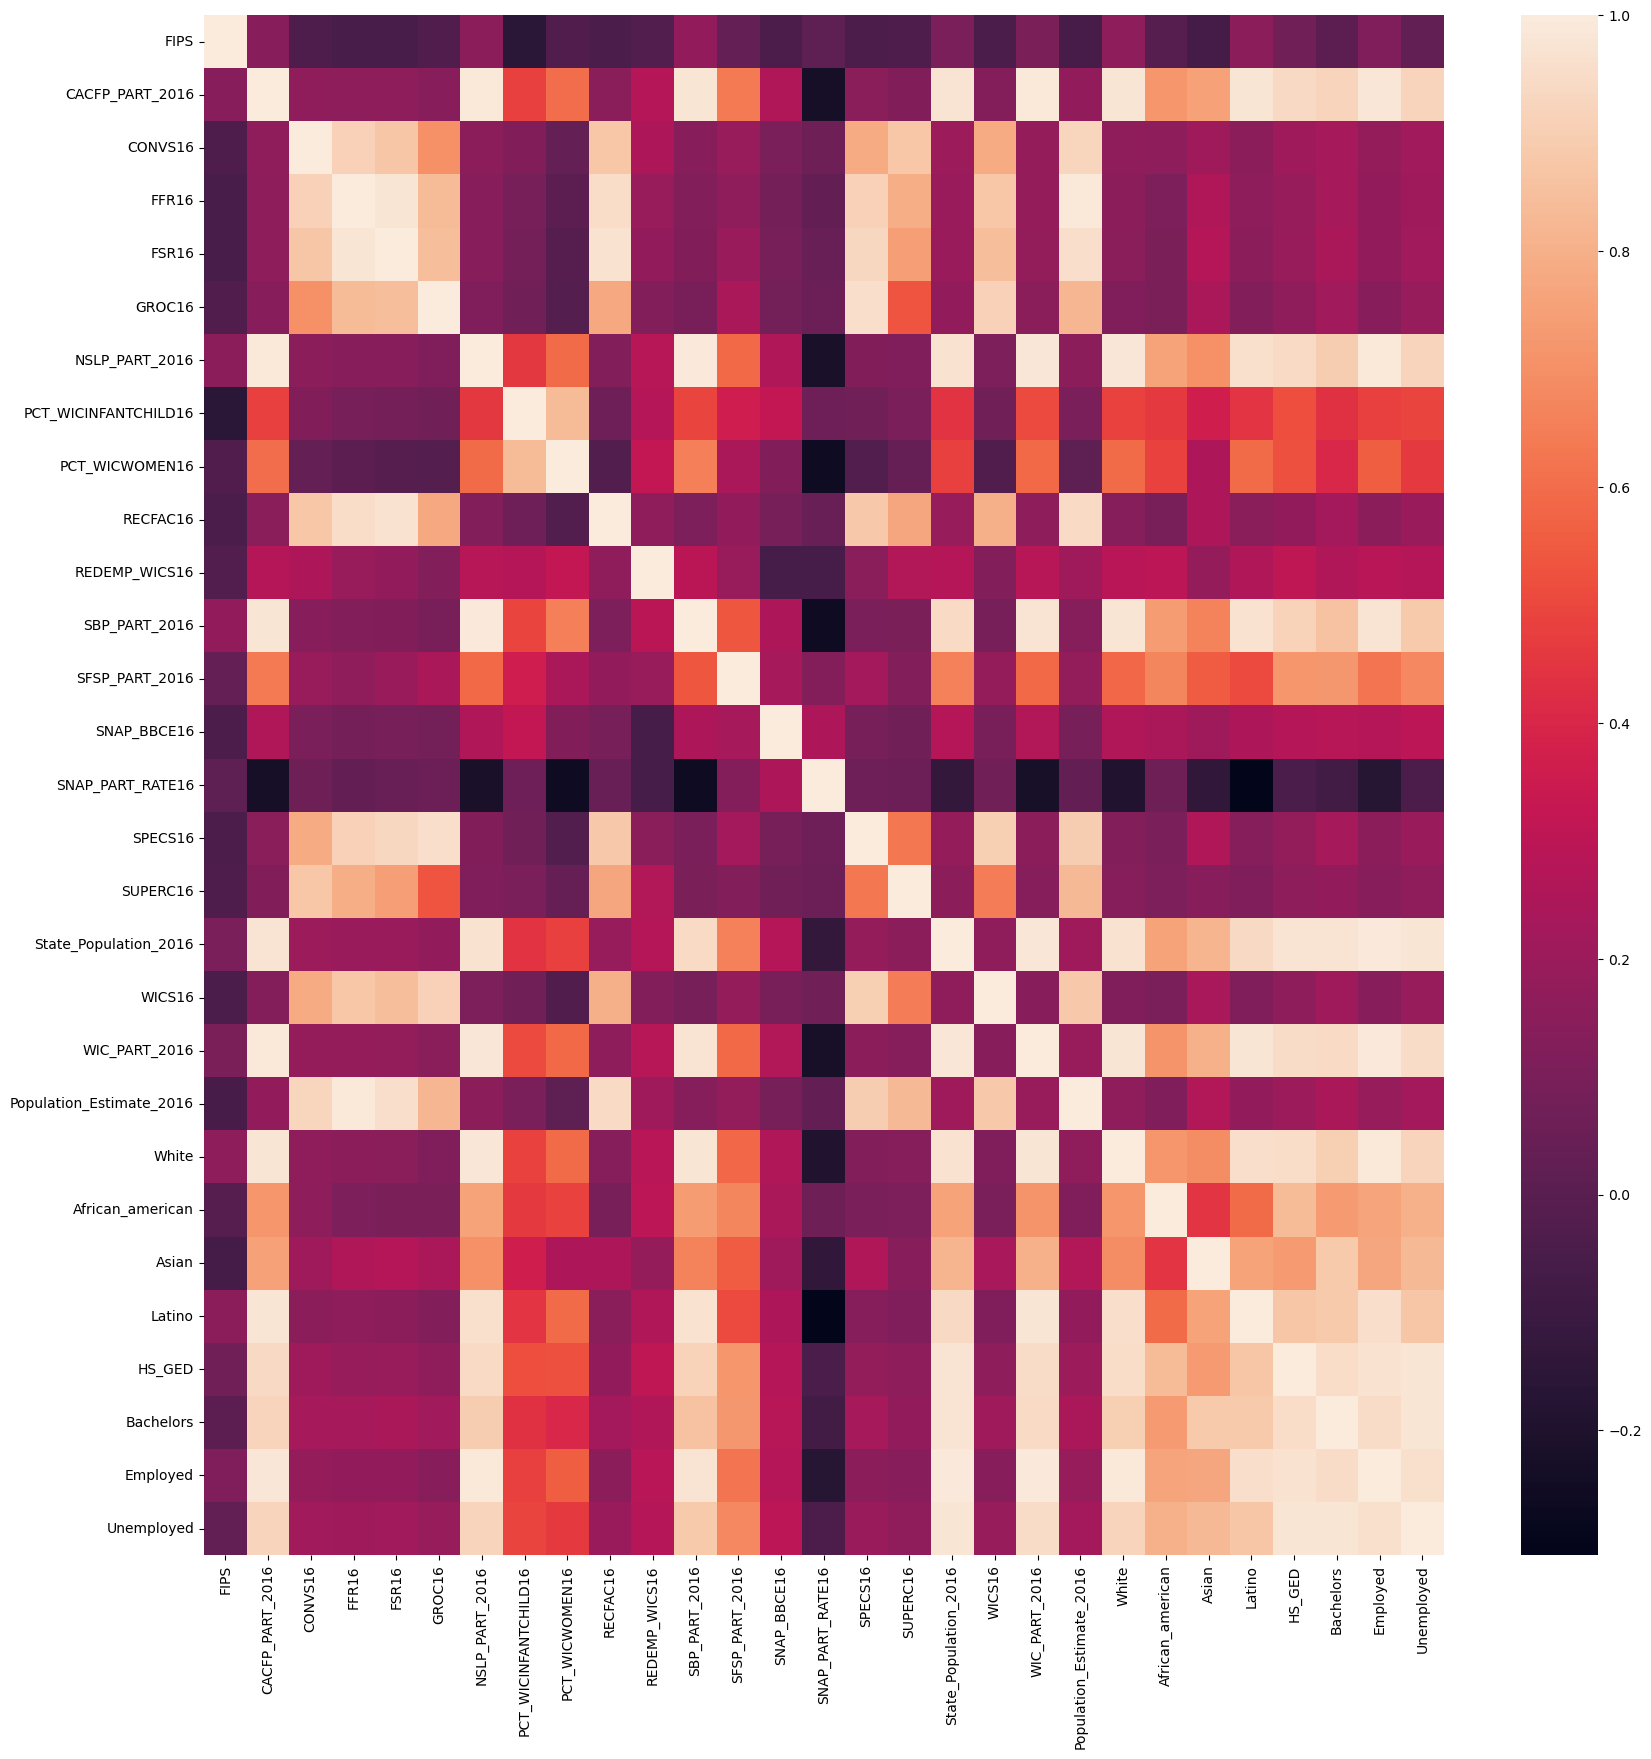

In [12]:
plt.figure(figsize=(20,20))
_ = sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.show()

### Correlation -- Sorted (Absolute Value)
I am creating the correlation distribution below to sort pairs of variables by correlation. This means pairs with the highest correlations will be at the top and those that are less correlated will at the bottom. I've also only included pairs with an absolute value correlation of greater than 0.6.

In [13]:
abs_corr = corr.abs()

In [14]:
s = abs_corr.unstack()
so = s.sort_values(kind='quicksort', ascending=False)
so = so[so > 0.6]
so = so[so < 1.0]

In [15]:
sorted_correlation = pd.DataFrame(so)
sorted_correlation

0
SBP_PART_2016  NSLP_PART_2016         0.992469
NSLP_PART_2016 SBP_PART_2016          0.992469
WIC_PART_2016  Employed               0.992069
Employed       WIC_PART_2016          0.992069
               State_Population_2016  0.991725
...                                        ...
SFSP_PART_2016 CACFP_PART_2016        0.634441
SUPERC16       SPECS16                0.631263
SPECS16        SUPERC16               0.631263
SFSP_PART_2016 Employed               0.622302
Employed       SFSP_PART_2016         0.622302

[240 rows x 1 columns]

#### Sorted correlation findings:
SBP_PART_2016 (School Breakfast Program) and NSLP_PART_2016 (National School Lunch Program) are the most highly correlated columns. This is because the requirements for both programs are the same. I've included fact sheets for these programs in my repository in a folder called "Fact Sheets."
Gov't website links:
* SBP: https://www.fns.usda.gov/sbp/school-breakfast-program
* NSLP: https://www.fns.usda.gov/nslp

In [16]:
#plt.figure(figsize=(20,20))
#_ = sns.heatmap(sorted_correlation, annot=False)
#plt.ylabel('Correlation of Column Variables')
#plt.show()

## Examining Variables

### Bar plots
Creating bar plots for key variables (grouped by state) will be helpful for understanding how these variables vary by state.

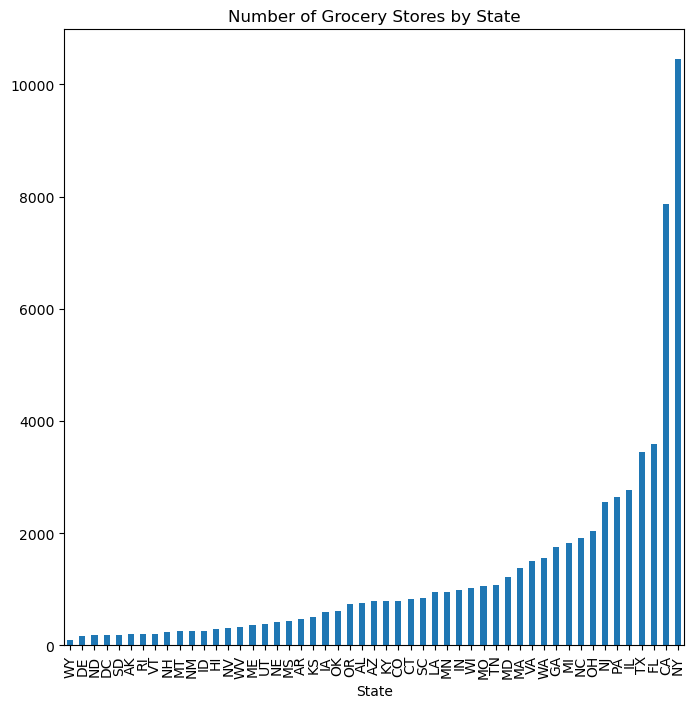

In [17]:
plt.figure(figsize=(8,8))
groc_by_state = df.groupby("State")['GROC16'].sum().sort_values(ascending=True)
_ = groc_by_state.plot(kind="bar", title="Number of Grocery Stores by State")
plt.show()

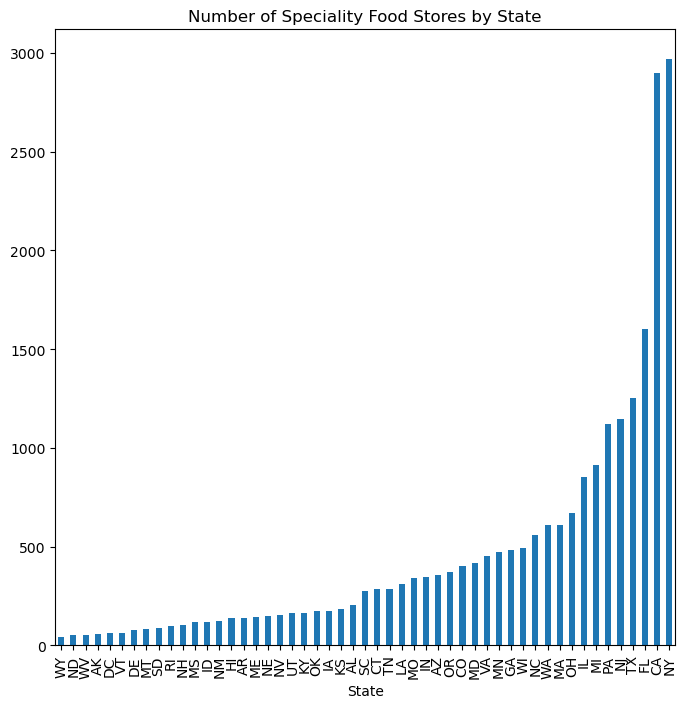

In [18]:
plt.figure(figsize=(8,8))
spec_by_state = df.groupby("State")['SPECS16'].sum().sort_values(ascending=True)
spec_by_state.plot(kind="bar", title="Number of Speciality Food Stores by State")
plt.show()

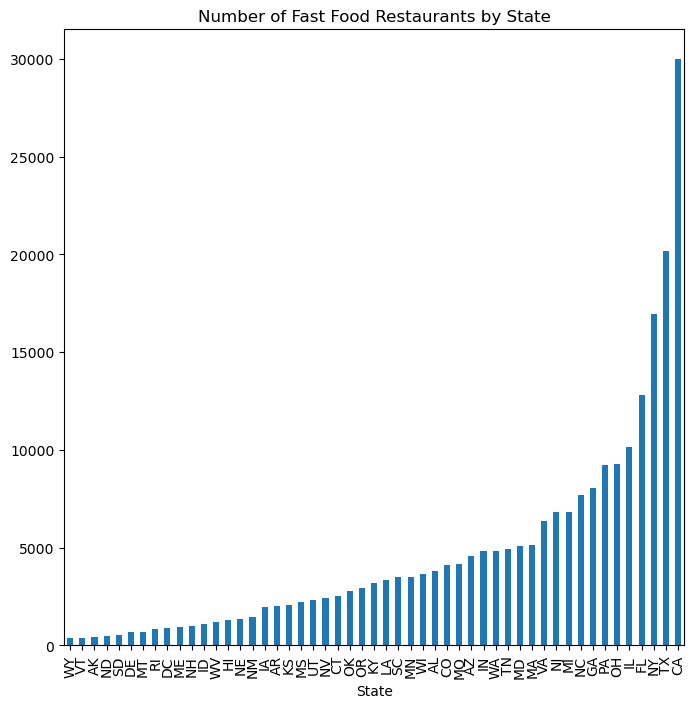

In [19]:
plt.figure(figsize=(8,8))
ff_by_state = df.groupby("State")['FFR16'].sum().sort_values(ascending=True)
ff_by_state.plot(kind="bar", title="Number of Fast Food Restaurants by State")
plt.show()

#### Initial bar plot findings:
All of the bar plots show the same trend. States with large cities have higher counts of food stores and restaurants. These plots are great for showing me how many stores/restaurants are in each state, but I will need to look at variables in comparison to one another to get more information.

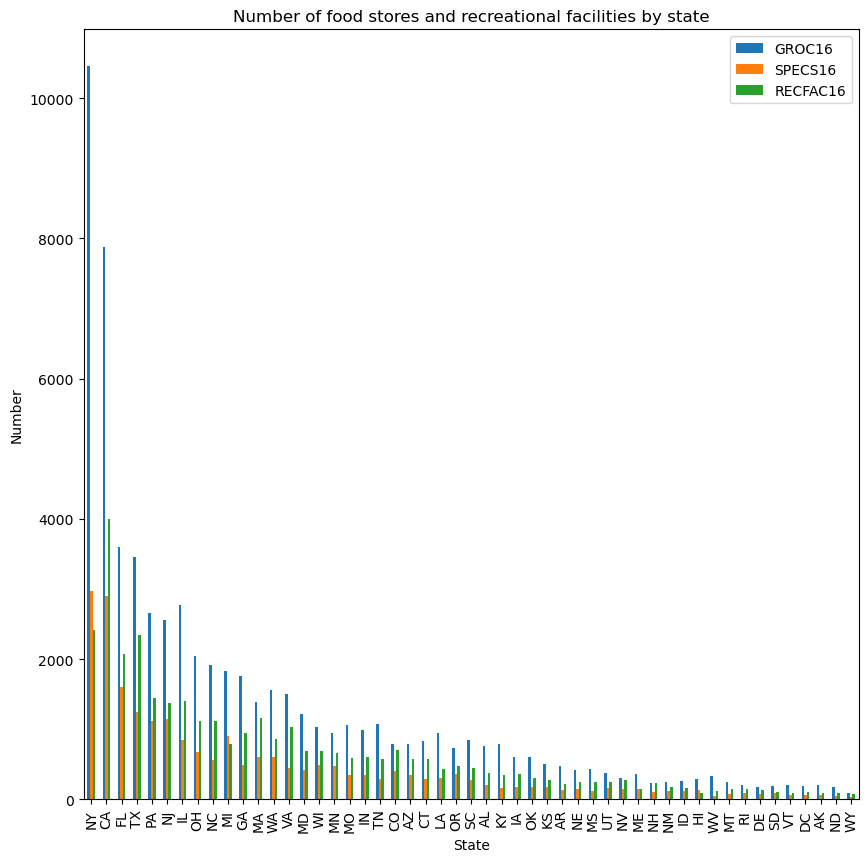

In [20]:
#plt.figure(figsize=(20,20))
groc_pop = df.groupby('State')[['GROC16','SPECS16','RECFAC16']].sum()
(groc_pop.reindex(index=groc_pop.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Number of food stores and recreational facilities by state'))
plt.xlabel('State')
plt.ylabel('Number');

#### Number of grocery stores, specialty food stores, and recreation centers by state -- Findings
The number of grocery stores in each state exceeds the number of specialty stores and rec centers; however, the number of grocery stores in NY and CA far exceeds the number of specialty food stores and rec centers. On the contrary, states like CO, NV, NH, and WY have counts rec centers that are near the counts of grocery stores; however, this trend does not hold true for specialty food stores. HI, MI, and NY are the only states with more specialty food stores than rec centers, but ME and SD have counts of rec centers and specialty food stores that appear to be relatively close to equal. The counts of all facilities seem to vary by population, meaning that states with higher populations seem to have more facilities overall.

In [21]:
groc_pop = df.groupby('State')[['GROC16', 'SPECS16', 'RECFAC16' ,'Population_Estimate_2016']].sum()
groc_pop.sort_values(by='Population_Estimate_2016')

,GROC16,SPECS16,RECFAC16,Population_Estimate_2016
State,,,,
WY,98,42,82,584290
VT,213,65,99,623644
DC,186,62,102,686575
AK,202,58,88,733330
ND,184,52,98,754353
SD,186,86,113,848460
DE,172,77,139,949216
MT,252,82,156,1040863
RI,205,97,145,1057063


#### groc_pop findings
I created groc_pop to compare the counts of grocery stores, recreational facilities, and specialty food stores to the populations in each state. I sorted the values by state population to get a sense of the overall trends in counts. In general, it looks like facilities increase as population increases. However, this trend does vary. For example, NY has a smaller population than CA, but NY has the most amount of grocery stores. FL also has a higher population than NY, but less than half the number of grocery stores. These trends are interesting to explore, and I think adding ratio variables later in EDA or in a later part of the process might be helpful.

In [22]:
restaurants_by_state = df.groupby('State')[['FFR16','FSR16']].sum()
restaurants_by_state.head()

,FFR16,FSR16
State,,
AK,421,578
AL,3822,2821
AR,2014,2015
AZ,4585,4157
CA,29995,30798


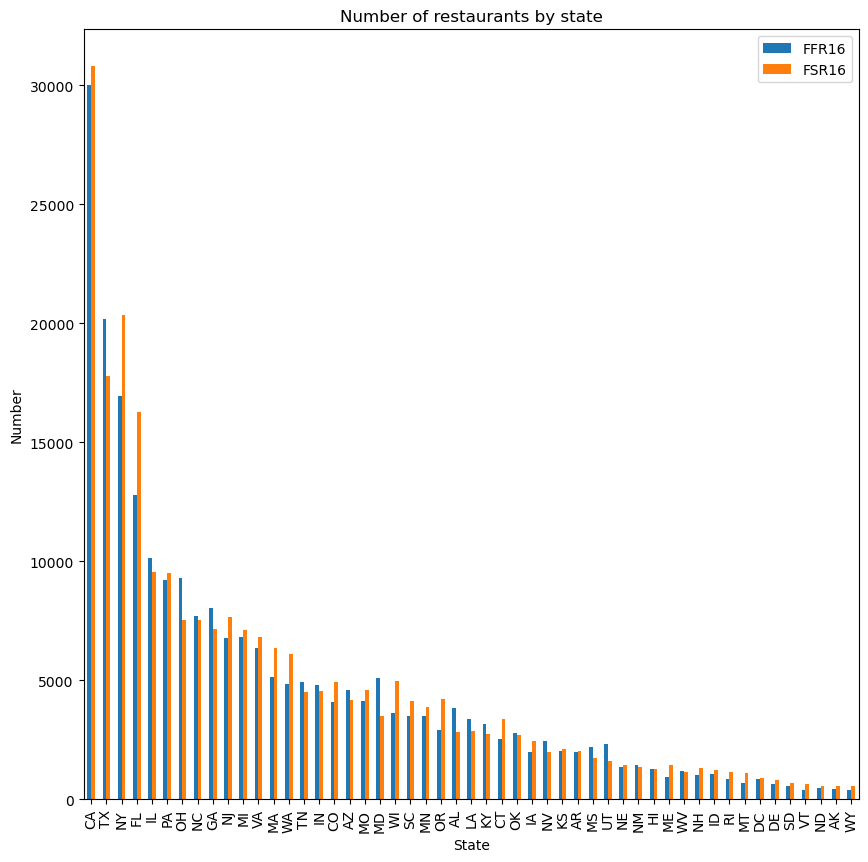

In [23]:
#plt.figure(figsize=(20,20))
(restaurants_by_state.reindex(index=restaurants_by_state.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Number of restaurants by state'))
plt.xlabel('State')
plt.ylabel('Number');

#### Number of restaurants by state -- Findings
As with the previous graph, the number of restaurants is likely associated with population size, meaning that as population size increases, the number of restaurants does as well. However, an interesting distinction in this graph is the comparison between full service restaurants and fast food restaurants.

States with more fast food restaurants than full service restaurants: TX, IL, OH, NC, GA, TN, IN, AZ, MD, AL, LA, KY, OK, NV, MS, UT, NM, WV.

Taking note of the states with more fast food restaurants than full service restaurants, my hunch is that these states have higher poverty rates and lower household incomes than the states with more full service restaurants. I would also like to see these states on the map because my initial finding is that most of these states are in the South, Midwest, and Soutwest, which I suspect are lower income/higher poverty states.

### Scatter plots

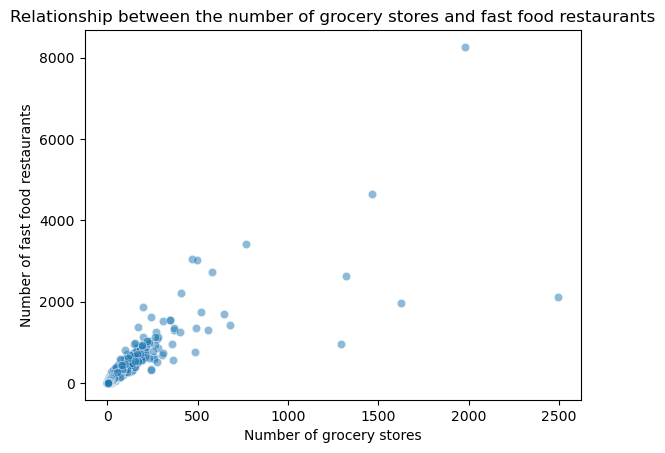

In [24]:
# Plot number of grocery stores against number of fast food restaurants
_ = sns.scatterplot(data=df, x='GROC16', y='FFR16', alpha=0.5)
_ = plt.xlabel('Number of grocery stores')
_ = plt.ylabel('Number of fast food restaurants')
_ = plt.title("Relationship between the number of grocery stores and fast food restaurants")
plt.show()

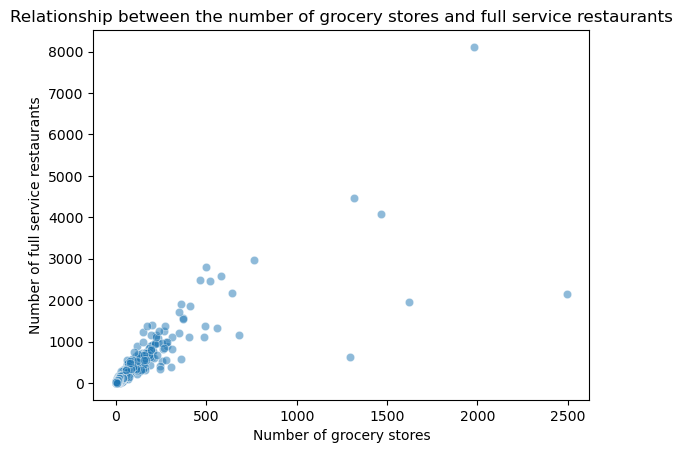

In [25]:
# Plot number of grocery stores against number of full-service restaurants
_ = sns.scatterplot(data=df, x='GROC16', y='FSR16', alpha=0.5)
_ = plt.xlabel('Number of grocery stores')
_ = plt.ylabel('Number of full service restaurants')
_ = plt.title("Relationship between the number of grocery stores and full service restaurants")
plt.show()

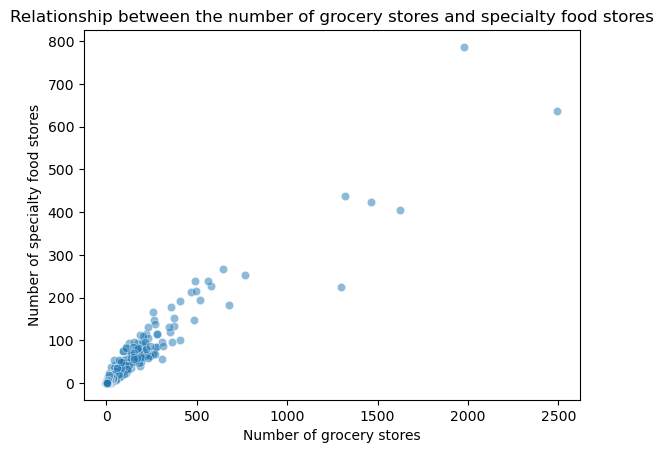

In [26]:
# Plot number of grocery stores against number of full-service restaurants
_ = sns.scatterplot(data=df, x='GROC16', y='SPECS16', alpha=0.5)
_ = plt.xlabel('Number of grocery stores')
_ = plt.ylabel('Number of specialty food stores')
_ = plt.title("Relationship between the number of grocery stores and specialty food stores")
plt.show()

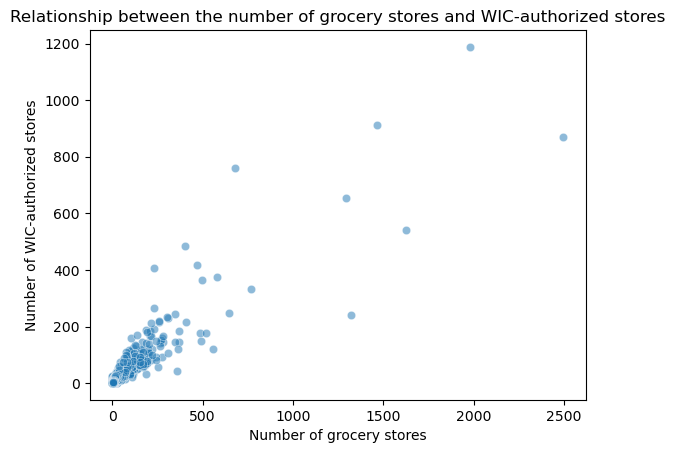

In [27]:
# Plot number of grocery stores against number of WIC-authorized stores
_ = sns.scatterplot(data=df, x='GROC16', y='WICS16', alpha=0.5)
_ = plt.xlabel('Number of grocery stores')
_ = plt.ylabel('Number of WIC-authorized stores')
_ = plt.title("Relationship between the number of grocery stores and WIC-authorized stores")
plt.show()

<Axes: xlabel='GROC16', ylabel='SPECS16'>

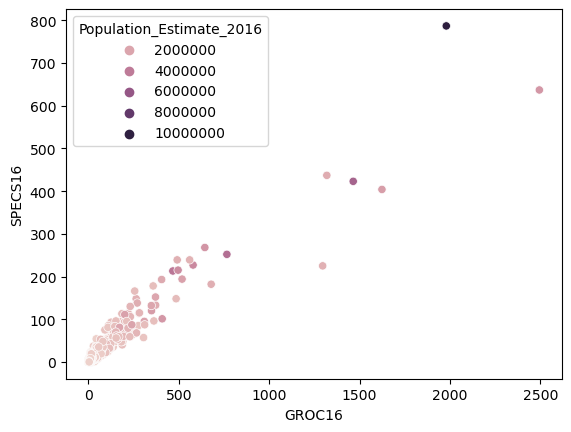

In [28]:
sns.scatterplot(x='GROC16', y='SPECS16', data=df, hue='Population_Estimate_2016')

#### Scatter plots -- Initial findings
All of the scatter plots shown above show positive relationships between variables. Initially, I only depicted the relationships between facility/store variables; however, these are not that helpful because they are likely highly correlated due to the association with population. In the last scatter plot, I took population into account and proved my hypothesis that population influences the correlation between counts of food stores/restaurants.

<Axes: xlabel='Population_Estimate_2016', ylabel='Bachelors'>

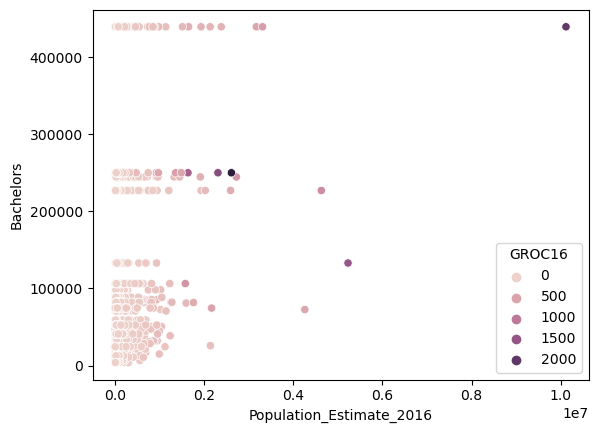

In [29]:
sns.scatterplot(x='Population_Estimate_2016', y='Bachelors', data=df, hue='GROC16')

<Axes: xlabel='Population_Estimate_2016', ylabel='Employed'>

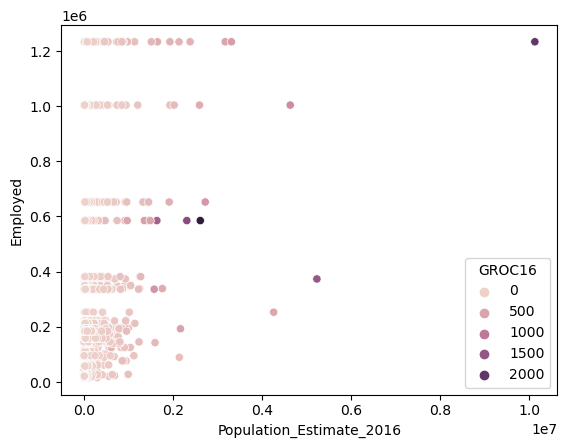

In [30]:
sns.scatterplot(x='Population_Estimate_2016', y='Employed', data=df, hue='GROC16')

#### Bachelors and Employed scatter plots -- Initial findings
I created the two scatter plots shown above to examine the relationship between population and demographic characteristics such as employment and bachelors degrees. I also included the grocery store counts in the relationship as well. My findings show that as population increases, there are higher numbers of grocery stores, but population is not very correlated with higher numbers of employed people or people with Bachelors degrees.

### Box plots

<function matplotlib.pyplot.show(close=None, block=None)>

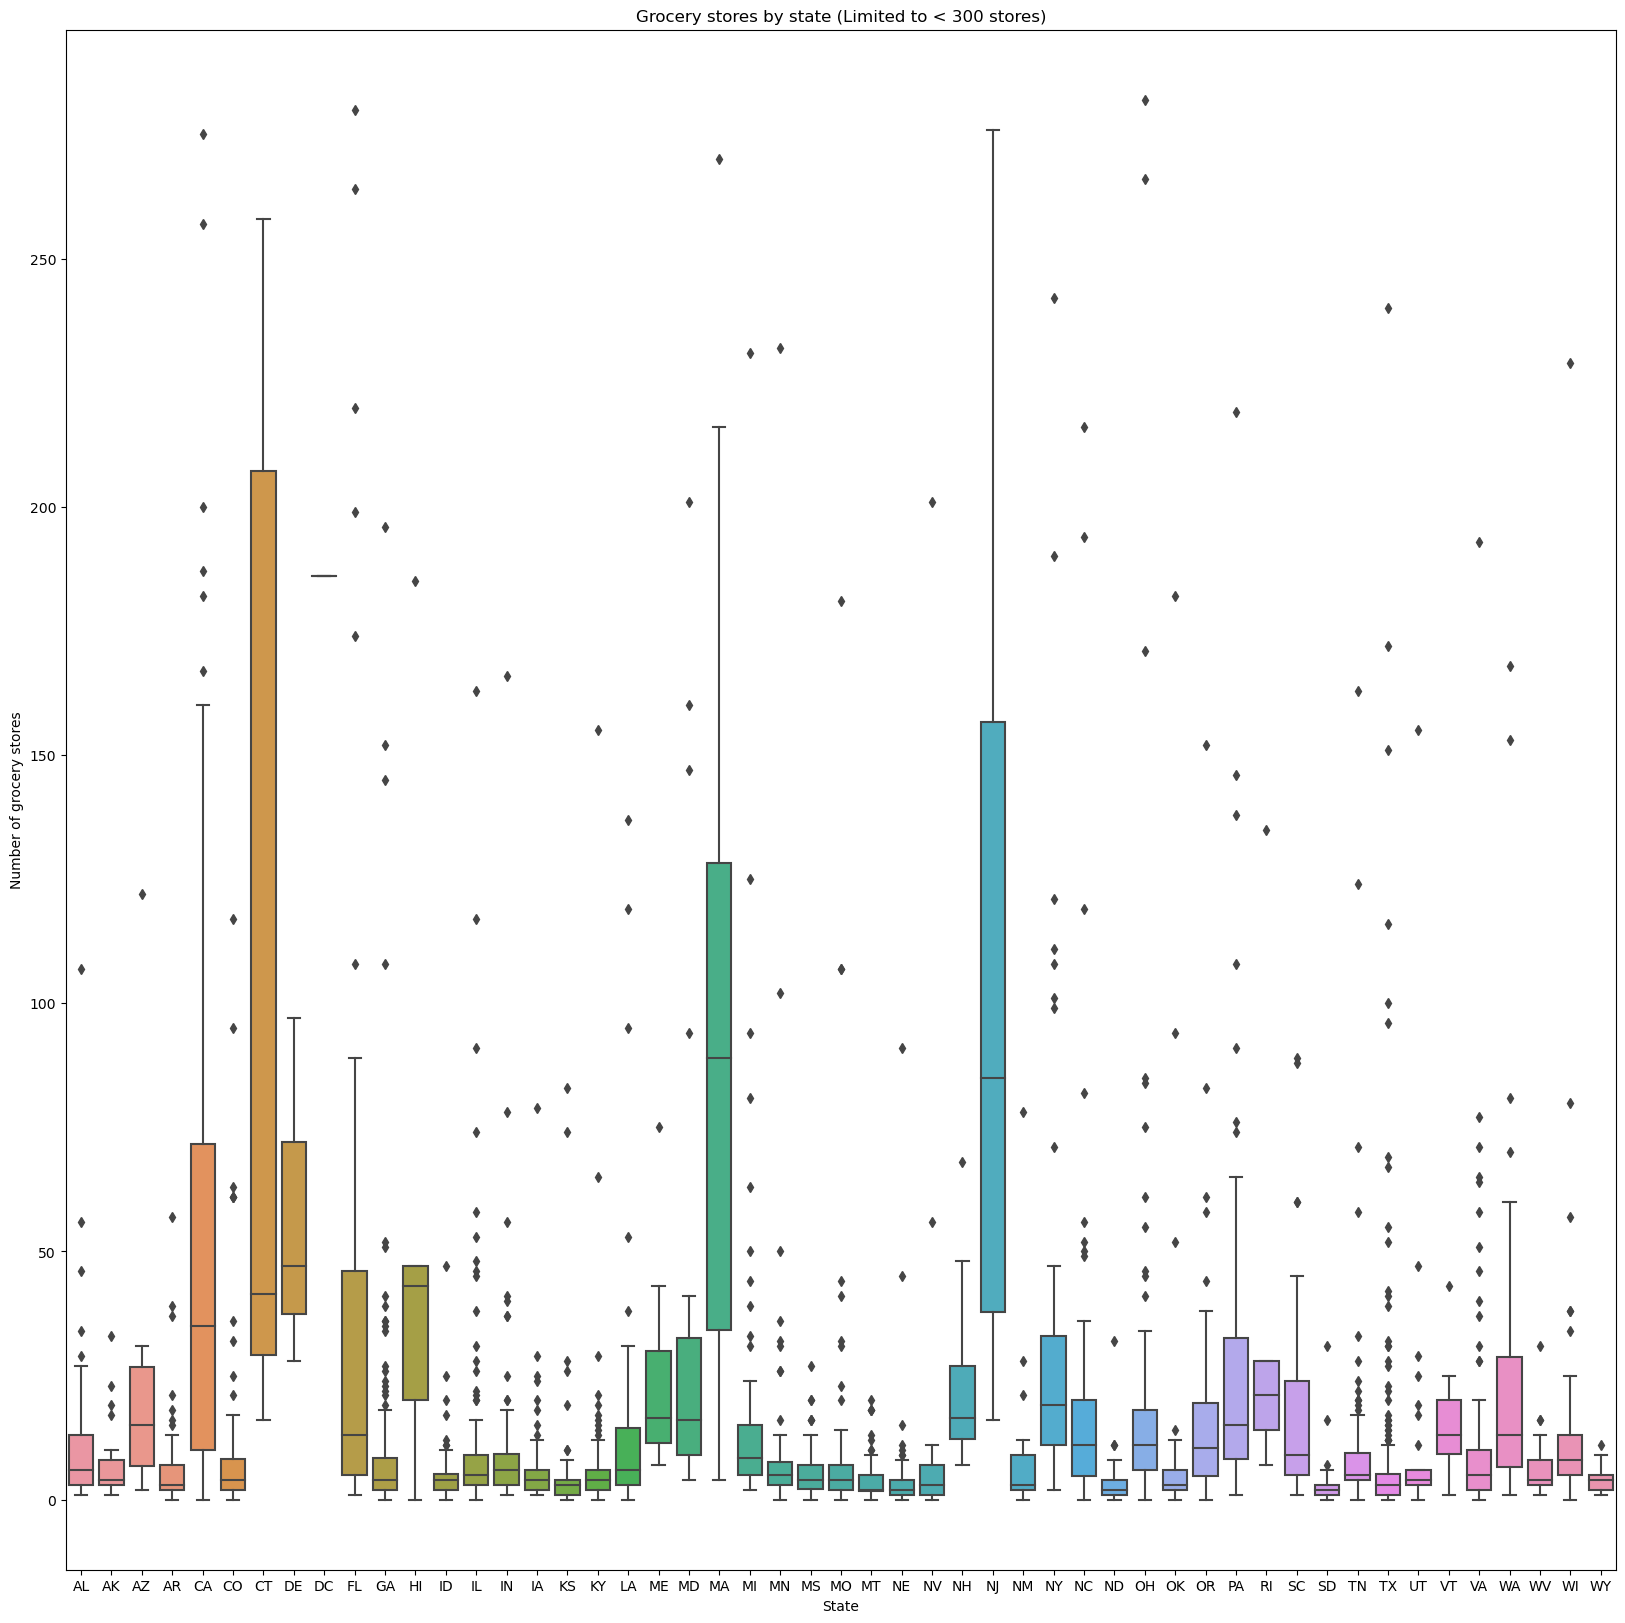

In [31]:
plt.figure(figsize=(20,20))
_ = sns.boxplot(x='State',y='GROC16',data=df.query('GROC16 < 300'))
_ = plt.xlabel('State')
_ = plt.ylabel('Number of grocery stores')
_ = plt.title('Grocery stores by state (Limited to < 300 stores)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

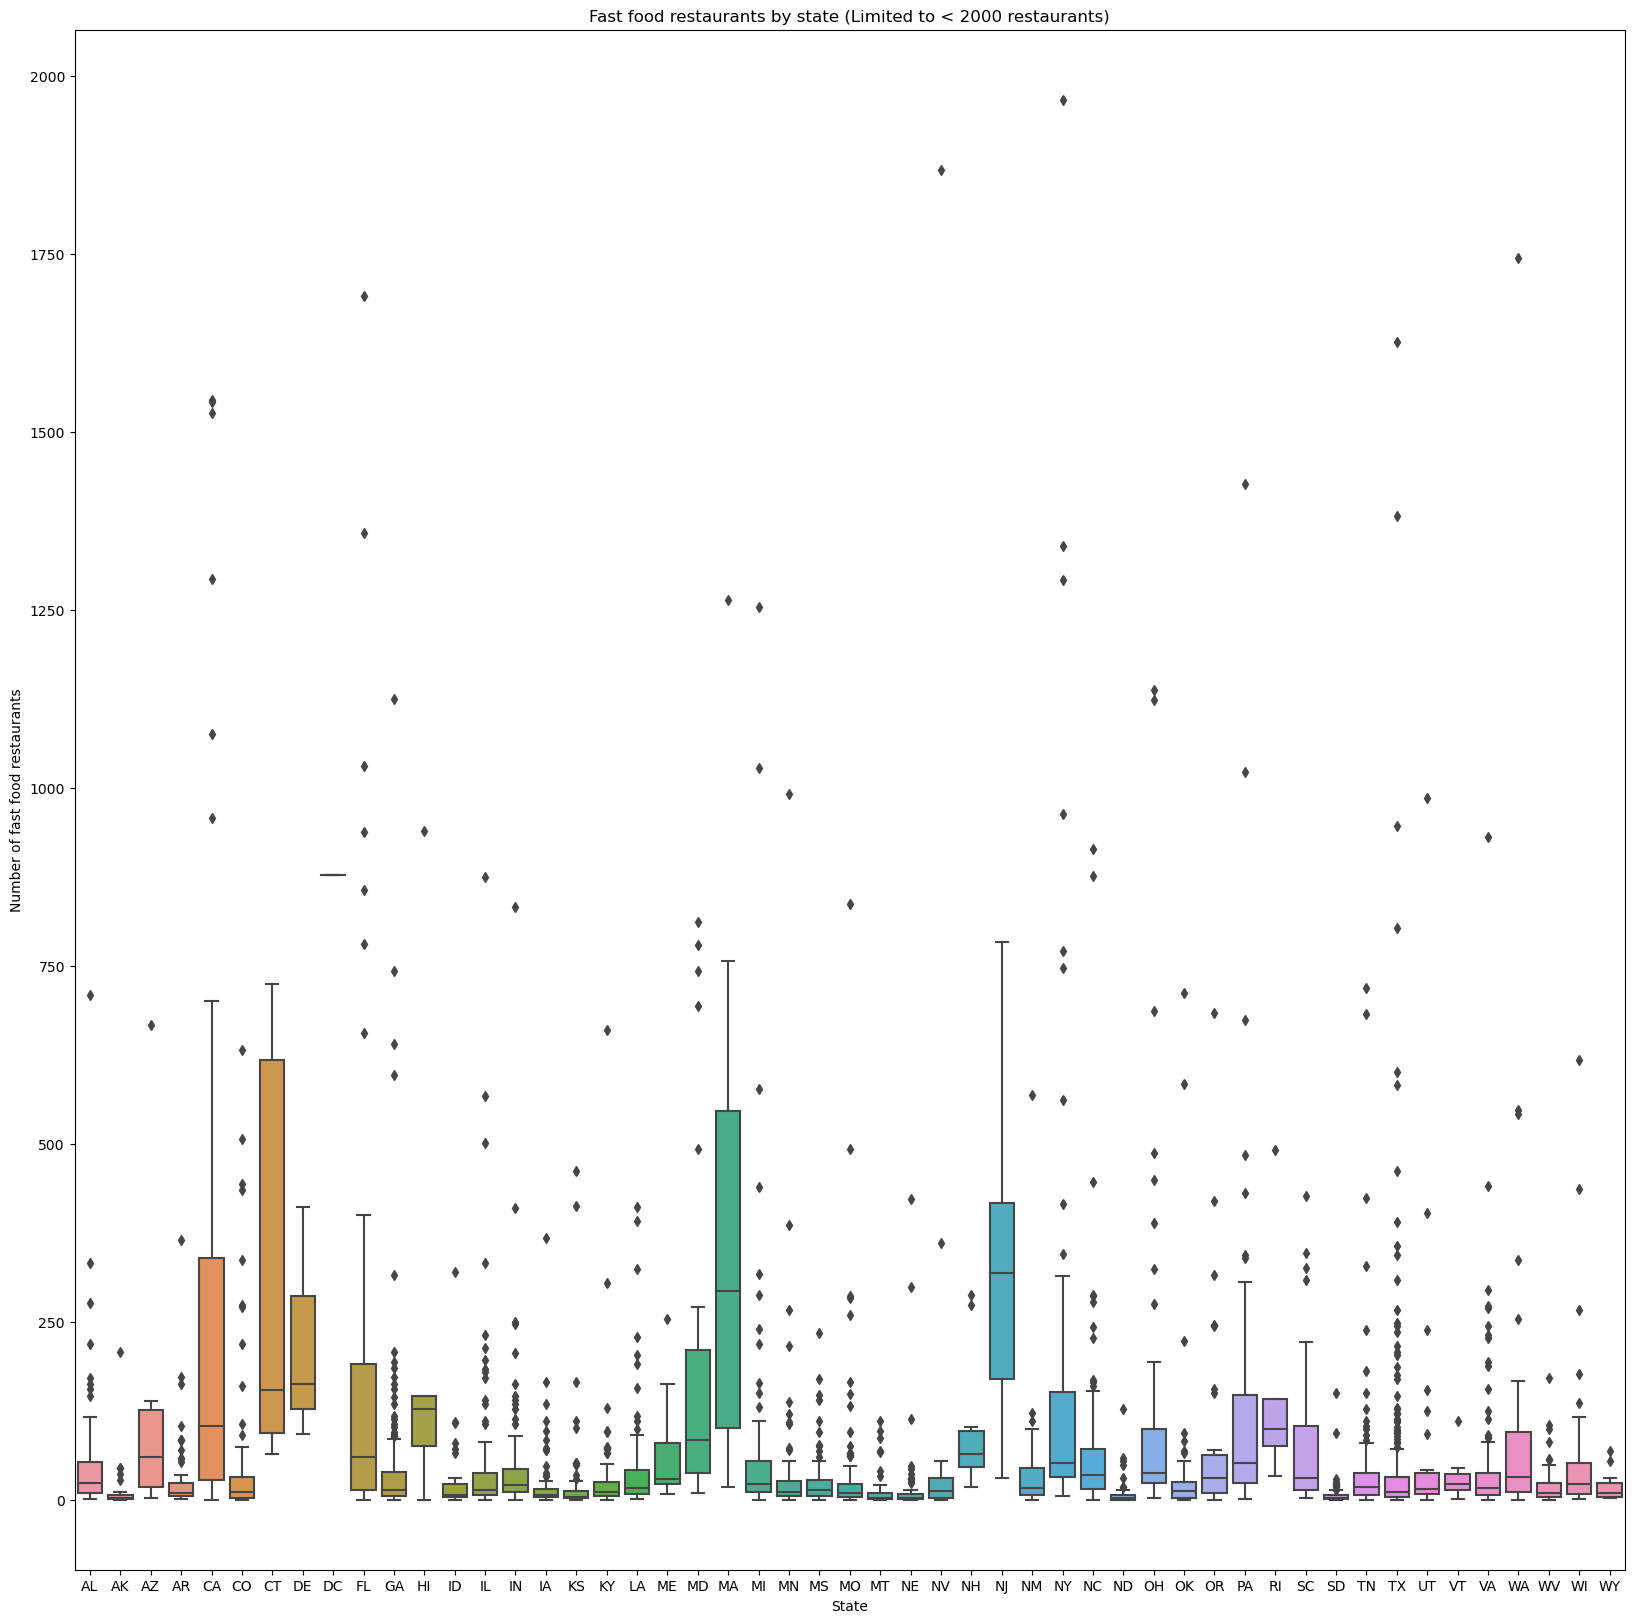

In [32]:
plt.figure(figsize=(20,20))
_ = sns.boxplot(x='State',y='FFR16',data=df.query('FFR16 < 2000'))
_ = plt.xlabel('State')
_ = plt.ylabel('Number of fast food restaurants')
_ = plt.title('Fast food restaurants by state (Limited to < 2000 restaurants)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

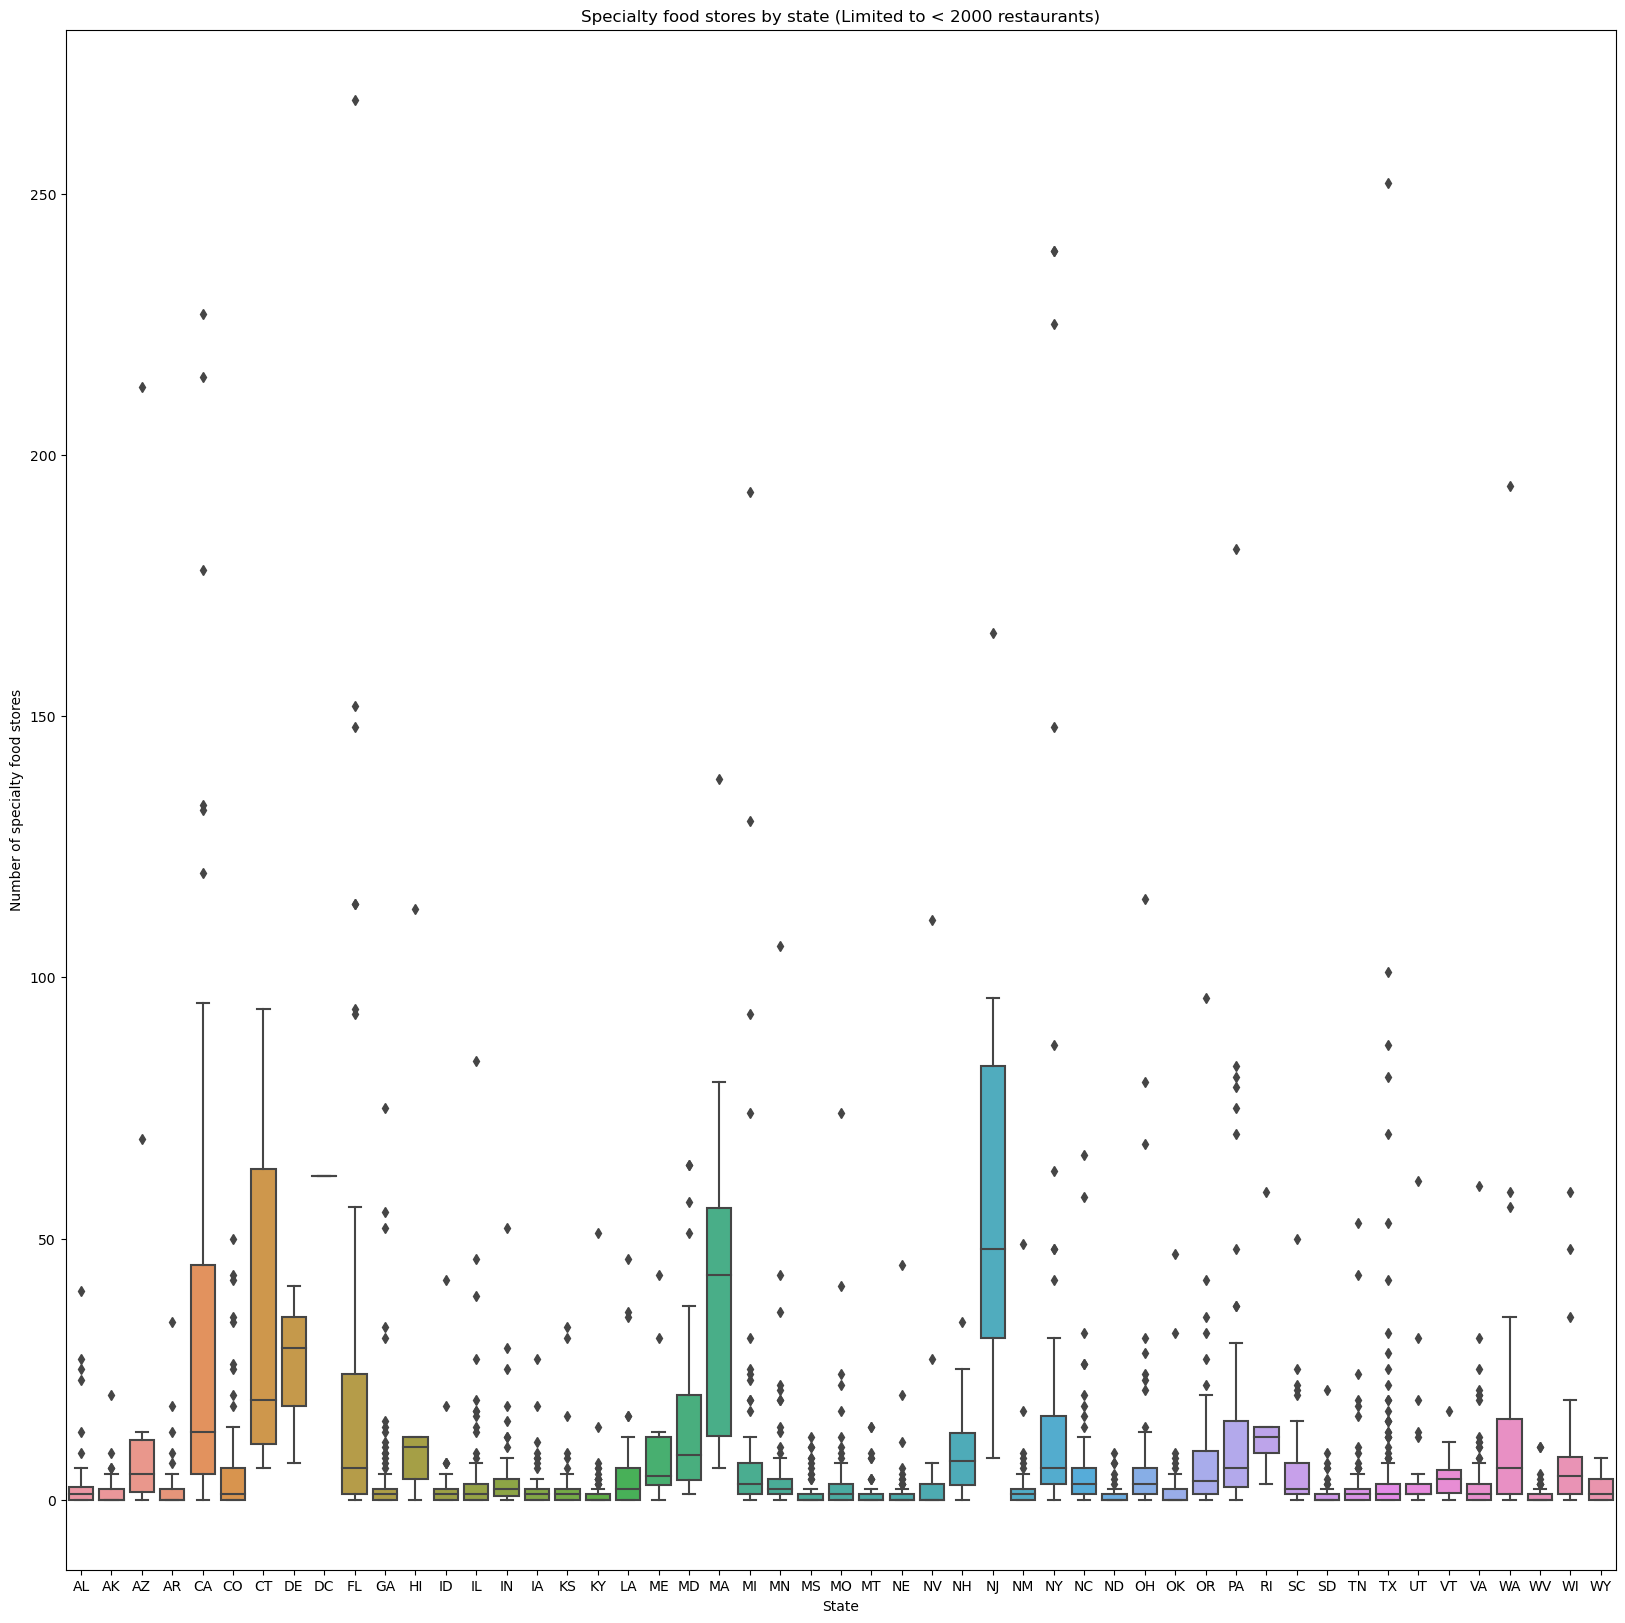

In [33]:
plt.figure(figsize=(20,20))
_ = sns.boxplot(x='State',y='SPECS16',data=df.query('SPECS16 < 300'))
_ = plt.xlabel('State')
_ = plt.ylabel('Number of specialty food stores')
_ = plt.title('Specialty food stores by state (Limited to < 2000 restaurants)')
plt.show

#### Box plots -- Initial findings
The last graphs I created were box plots. I wanted to examine the food stores by state, specifically looking at the distribution of store counts per state. It appears that states on the East Coast as well as California have the largest spreads for the counts of stores and restaurants.

In [34]:
ratio_groc = df['GROC16']/df['Population_Estimate_2016']
ratio_groc.head()

0    0.000054
1    0.000140
2    0.000155
3    0.000221
4    0.000087
dtype: float64

#### Ratios
Above, I created a ratio variable of GROC16 to Population. I will explore this more if needed later in the process.

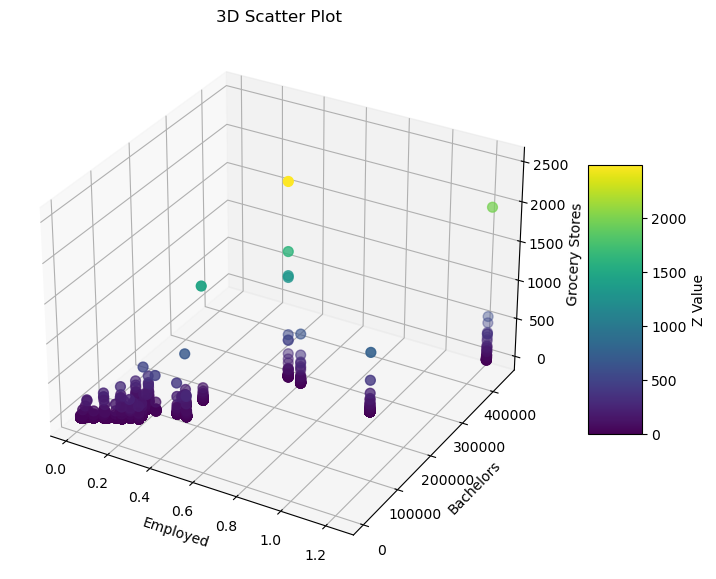

In [45]:
x = df['Employed']
y = df['Bachelors']
z = df['GROC16']

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Add labels
ax.set_xlabel('Employed')
ax.set_ylabel('Bachelors')
ax.set_zlabel('Grocery Stores')

# Color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Z Value')

plt.title('3D Scatter Plot')
plt.show()


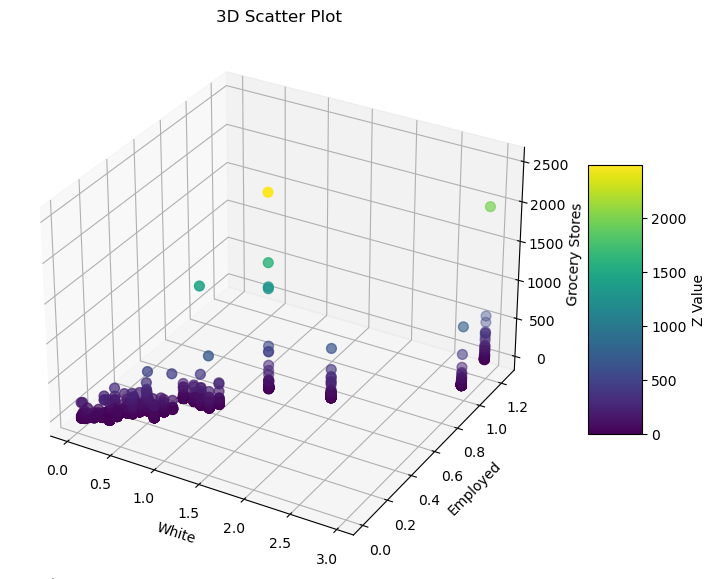

In [49]:
x = df['White']
y = df['Employed']
z = df['GROC16']

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Add labels
ax.set_xlabel('White')
ax.set_ylabel('Employed')
ax.set_zlabel('Grocery Stores')

# Color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Z Value')

plt.title('3D Scatter Plot')
plt.show()


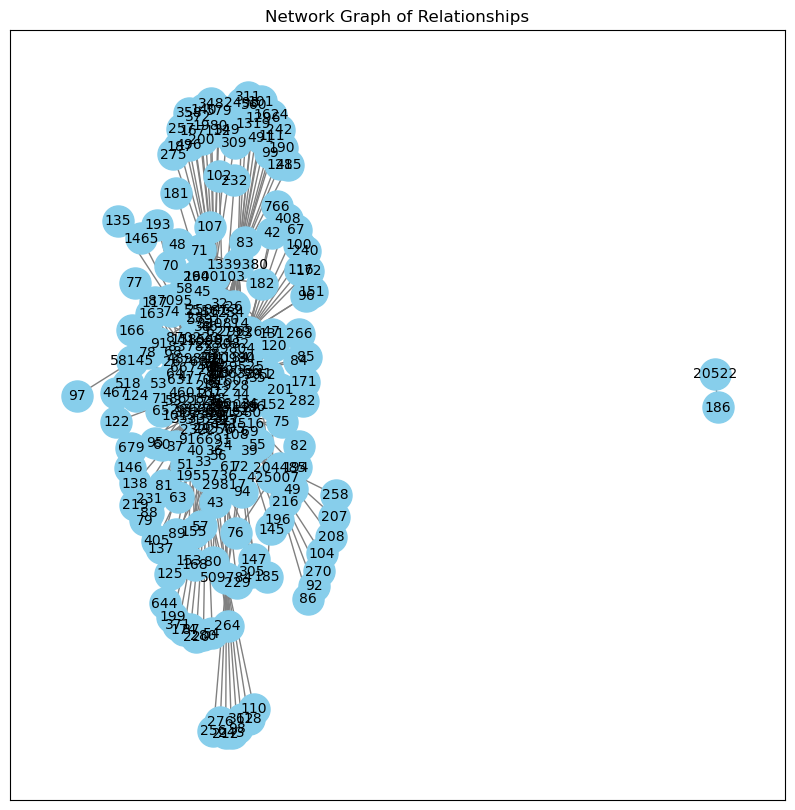

In [77]:
import networkx as nx

G = nx.Graph()
# Assuming df has two columns representing pairs of connected nodes
G.add_edges_from(df[['White','GROC16']].values)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', font_size=10)
plt.title('Network Graph of Relationships')
plt.show()